<a href="https://colab.research.google.com/github/dipteshh/ml-learn/blob/main/stock_price_predict_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv('nifty50.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,10358.650391,10368.450195,10266.950195,10308.950195,10308.950195,240200.0
1,2017-11-10,10304.349609,10344.950195,10254.099609,10321.750000,10321.750000,279400.0
2,2017-11-13,10322.000000,10334.150391,10216.250000,10224.950195,10224.950195,210300.0
3,2017-11-14,10223.400391,10248.000000,10175.549805,10186.599609,10186.599609,305000.0
4,2017-11-15,10171.950195,10175.450195,10094.000000,10118.049805,10118.049805,207400.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1230 non-null   float64
 2   High       1230 non-null   float64
 3   Low        1230 non-null   float64
 4   Close      1230 non-null   float64
 5   Adj Close  1230 non-null   float64
 6   Volume     1230 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


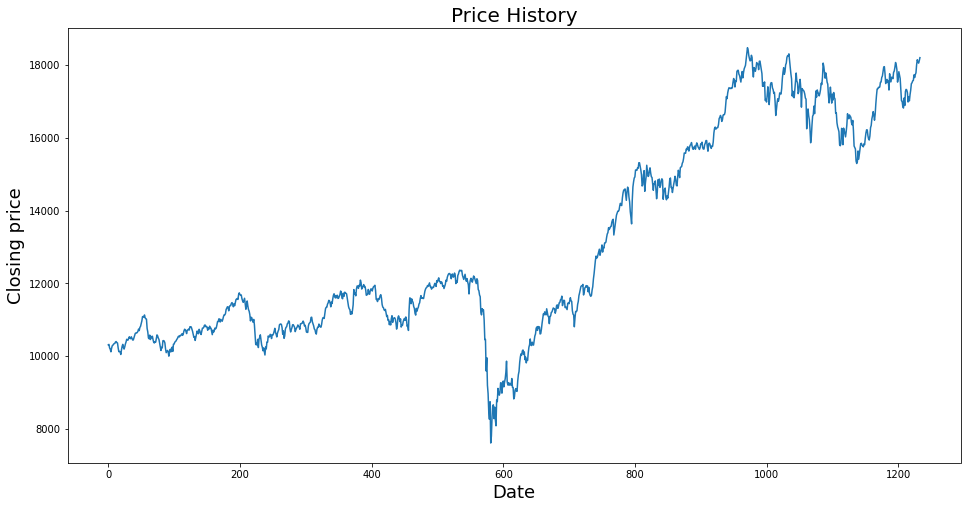

In [106]:
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price',fontsize=18)
plt.show()

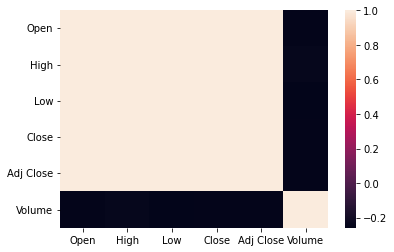

In [94]:
df.dropna()
import seaborn as sns
sns.heatmap(df.corr())

In [95]:
del df['Adj Close']
del df['Volume']
del df['Date']

In [96]:
df.dropna()
df.head()

,Open,High,Low,Close
0,10358.650391,10368.450195,10266.950195,10308.950195
1,10304.349609,10344.950195,10254.099609,10321.750000
2,10322.000000,10334.150391,10216.250000,10224.950195
3,10223.400391,10248.000000,10175.549805,10186.599609
4,10171.950195,10175.450195,10094.000000,10118.049805


In [97]:
df = df[np.isfinite(df).all(1)]

In [98]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [99]:
x.head()

,Open,High,Low
0,10358.650391,10368.450195,10266.950195
1,10304.349609,10344.950195,10254.099609
2,10322.000000,10334.150391,10216.250000
3,10223.400391,10248.000000,10175.549805
4,10171.950195,10175.450195,10094.000000


In [100]:
y.head()

,Close
0,10308.950195
1,10321.750000
2,10224.950195
3,10186.599609
4,10118.049805


In [101]:
x = x.values[:]
y = y.values[:]

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=15)

In [103]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(x_train,y_train)

LinearRegression()

In [104]:
y_pred = lreg.predict(x_test)

In [105]:
lreg.score(x_test,y_test)

0.9997062769891294